In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [ ]:
mask = cv2.imread('1.png')
img = cv2.resize(mask, (256,256))
img = cv2.bitwise_not(img)
mask = img
#mask = cv2.resize(mask, (256,256))
hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
thresh1 = cv2.threshold(s, 92, 255, cv2.THRESH_BINARY)[1]
# threshold value image and invert
thresh2 = cv2.threshold(v, 128, 255, cv2.THRESH_BINARY)[1]
thresh2 = 255 - thresh2
# combine the two threshold images as a mask
mask = cv2.add(thresh1,thresh2)
rmask = cv2.bitwise_not(mask)
rmask = cv2.cvtColor(rmask, cv2.COLOR_BGR2RGB)
cv2.imwrite('1_mask.png', rmask)

In [ ]:
mask = cv2.imread('img.bmp')
mask  = cv2.bitwise_not(mask)
label_im, nb_labels = ndimage.label(mask)
for i in range(nb_labels):

            # create an array which size is same as the mask but filled with 
            # values that we get from the label_im. 
            # If there are three masks, then the pixels are labeled 
            # as 1, 2 and 3.

      mask_compare = np.full(np.shape(label_im), i+1) 

            # check equality test and have the value 1 on the location of each mask
      separate_mask = np.equal(label_im, mask_compare).astype(int) 

            # replace 1 with 255 for visualization as rgb image

      separate_mask[separate_mask == 1] = 255 
      
      cv2.imwrite('dics.png', separate_mask)


In [60]:


img = cv2.pyrDown(cv2.imread('Disc.png'))
img = cv2.resize(img,(512,512))

ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                       127, 255, cv2.THRESH_BINARY)

contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:

  if cv2.contourArea(contour) < 100:
     continue

  rect = cv2.minAreaRect(contour)
  box = cv2.boxPoints(rect)

  ext_left = tuple(contour[contour[:, :, 0].argmin()][0])
  ext_right = tuple(contour[contour[:, :, 0].argmax()][0])
  ext_top = tuple(contour[contour[:, :, 1].argmin()][0])
  ext_bot = tuple(contour[contour[:, :, 1].argmax()][0])

    
  imgRGB = cv2.imread('1.png')
  imgRGB = cv2.resize(imgRGB, (512,512))
        
  cup_mask = cv2.imread('cup.png')
  cup_mask = cv2.resize(cup_mask, (512,512))

  crop_rgb = imgRGB[ext_top[1]-5:ext_bot[1]+5, ext_left[0]-5:ext_right[0]+5]
  cropped_image = img[ext_top[1]-5:ext_bot[1]+5, ext_left[0]-5:ext_right[0]+5]
  cropped_image_cup = cup_mask[ext_top[1]-5:ext_bot[1]+5, ext_left[0]-5:ext_right[0]+5]

  cropped_image = cv2.resize(cropped_image, (512,512)) #Disco..
  crop_rgb = cv2.resize(crop_rgb, (512,512)) #Crop da imagem
  crop_rgb = cv2.cvtColor(crop_rgb, cv2.COLOR_BGR2RGB)
  cropped_image_cup = cv2.resize(cropped_image_cup, (512,512)) #Crop da escavação


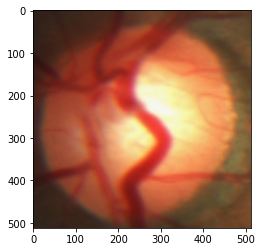

In [61]:
plt.imshow(crop_rgb)

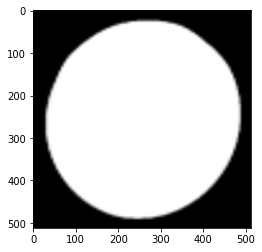

In [62]:
plt.imshow(cropped_image)

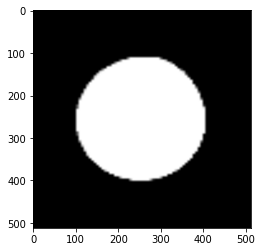

In [63]:

plt.imshow(cropped_image_cup)